In [107]:
X  = df_train_3[df_train1.columns[-50:]]
Y = df_train_3['final_status']

In [108]:
split = int(0.75*(len(X)))
X_train = np.array(X)[:split]
X_valid = np.array(X)[split:]
Y_train =  Y[:split]
Y_test =  Y[split:]

In [164]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf =LogisticRegression()
clf.fit(X_train,Y_train)
prob = clf.predict_proba(X_valid)

In [165]:
x = prob.T[1]>0.35
pred = x*1

In [166]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(pred, Y_test)

array([[10625,  2438],
       [ 8290,  4119]])

In [168]:
f1_score(pred, Y_test)

0.43435621638721916

In [189]:
from sklearn.decomposition import PCA
p  = PCA(n_components=3)
ca = p.fit_transform(np.array(X))

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [197]:
xs = ca.T[0]
ys = ca.T[1]
zs = ca.T[2]
ax.scatter(xs, ys, zs, c='r', marker='o')


# xs = ca[Y == 1].T[0]
# ys = ca[Y == 1].T[1]
# zs = ca[Y == 1].T[2]
# ax.scatter(xs, ys, zs, c='b', marker='^')


In [193]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
import pandas as pd
import numpy as np
import time


df_train1 = pd.read_csv("train_G.csv")
df_test1 = pd.read_csv("test_G.csv")
del df_train1['Unnamed: 0']
del df_test1['Unnamed: 0']

In [207]:
import numpy as np
import time
df_train = df_train1[:]
df_test = df_test1[:]



import warnings
warnings.filterwarnings("ignore")
cols_to_use = ['name','desc']
len_feats = ['name_len','desc_len']
count_feats = ['name_count','desc_count']

for i in np.arange(2):
    df_train[len_feats[i]] = df_train[cols_to_use[i]].apply(str).apply(len)
    df_train[count_feats[i]] = df_train[cols_to_use[i]].apply(str).apply(lambda x: len(x.split(' ')))
    
    
for i in np.arange(2):
    df_test[len_feats[i]] = df_test[cols_to_use[i]].apply(str).apply(len)
    df_test[count_feats[i]] = df_test[cols_to_use[i]].apply(str).apply(lambda x: len(x.split(' ')))
    

In [208]:
#Flag 1 based on goal
thre = 700000
df_test_decided_1  = df_test[df_test.goal>=thre]
df_test_1  = df_test[df_test.goal<thre]
df_train_decided_1  = df_train[df_train.goal>=thre]
df_train_1  = df_train[df_train.goal<thre]

df_test_decided_1['final_status'] = 0

#Flag 2 based on disable_communication

df_test_decided_2  = df_test_1[df_test_1.disable_communication ==1 ]
df_test_2  = df_test_1[df_test_1.disable_communication !=1]
df_train_decided_2  = df_train_1[df_train_1.disable_communication ==1 ]
df_train_2  = df_train_1[df_train_1.disable_communication !=1]

df_test_decided_2['final_status'] = 0

for df in [df_test_decided_2,df_test_2,df_train_decided_2,df_train_2]:
    del df['disable_communication']
    

#Flag 2 based on   deadline-state_changed_at

df_test_decided_3  = df_test_2[df_test_2['deadline-state_changed_at'].values<0]
df_test_3  = df_test_2[df_test_2['deadline-state_changed_at'].values>=0]
df_train_decided_3  = df_train_2[df_train_2['deadline-state_changed_at'].values<0]
df_train_3  = df_train_2[df_train_2['deadline-state_changed_at'].values>=0]

df_test_decided_3['final_status'] = 0



In [202]:
import pandas as pd
nBsub_US = pd.read_csv('C:\Users\c5067944\Desktop\COMPS\mlc2\MyData.csv')

nBsub = nBsub_US[['project_id','final_status']]

frames = [nBsub, df_test_decided_1[['project_id','final_status']],df_test_decided_2[['project_id','final_status']],df_test_decided_3[['project_id','final_status']]]
nBsub = pd.concat(frames)
nBsub.to_csv("god.csv",index = False) #0.6526

In [60]:
len(nBsub)

63465

In [97]:
cols = ['goal','country','currency','deadline-state_changed_at',
 'launched_at-created_at','deadline-launched_at','deadline-created_at','keys_no','keys_len',]+list(df_train_1.columns[-54:])

In [24]:
cols =['project_id',  'goal',
  'country',
  'currency',
 'deadline-state_changed_at',
 'deadline-created_at',
 'keys_no',
 'keys_len',
 'name_len',
 'name_count',
 'desc_len',
 'desc_count',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',

]


In [10]:
df_tr = df_train_3[cols+['final_status']]
df_te = df_test_3[cols]

In [12]:
df_tr.to_csv('rtr.csv')
df_te.to_csv('rte.csv')

In [254]:

df_tr = df_train_3[cols]
df_te = df_test_3[cols]
Y = df_train_3['final_status'].values



X_train = df_tr.to_dict('records')
X_test = df_te.to_dict('records')
X_tr = []
X_te = []
X_tr.extend(X_train)
X_te.extend(X_test)
X_total = X_tr + X_te



from sklearn.feature_extraction import DictVectorizer    
enc = DictVectorizer()
X_encoded_total =enc.fit_transform(X_total)
X_encoded_train =X_encoded_total[:len(X_tr)]
X_encoded_test =X_encoded_total[len(X_tr):]

In [243]:
split = int(0.75*(len(X_encoded_train.toarray())))
X_train = X_encoded_train.toarray()[:split]
X_valid = X_encoded_train.toarray()[split:]
Y_train =  Y[:split]
Y_test =  Y[split:]

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 500)
clf.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=500, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [251]:
from sklearn.metrics import accuracy_score,f1_score
print 'training acc:', accuracy_score(clf.predict(X_train), Y_train)
print 'testing acc:', accuracy_score(clf.predict(X_valid), Y_test)
print f1_score(clf.predict(X_valid), Y_test)

training acc: 0.677554438861
testing acc: 0.707993090452
0.381403858949


In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clf.predict(X_valid), Y_test)

array([[15741,  4264],
       [ 3174,  2293]])

In [182]:
Counter(Y_test)

Counter({0: 18915, 1: 6557})

In [132]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


for train_index, test_index in kf.split(X_encoded_train):
    X_train, X_test = X_encoded_train[train_index], X_encoded_train[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

<81511x75 sparse matrix of type '<type 'numpy.float64'>'
	with 5016823 stored elements in Compressed Sparse Row format>

In [261]:
l = pd.read_csv('train1.csv')

In [264]:
l1 = l[:10]
del l1['Unnamed: 0']

In [266]:
l1.to_csv('sample.csv',index= False)

In [ ]:
l1

In [208]:
clf = DecisionTreeClassifier(min_samples_split = 100)
clf.fit(X_encoded_train,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
clf.predict(X_)

In [214]:
nvb_pred = clf.predict(X_encoded_test)

In [215]:
len(nvb_pred)

46070

In [216]:
nBsub = pd.DataFrame({'project_id':df_test_3['project_id'],'final_status':nvb_pred})
nBsub = nBsub[['project_id','final_status']]

In [12]:
frames = [nBsub ,df_test_decided_1[['project_id','final_status']],df_test_decided_2[['project_id','final_status']],df_test_decided_3[['project_id','final_status']]]

NameError: name 'nBsub' is not defined

In [218]:
nBsub = pd.concat(frames)

In [219]:
nBsub.to_csv("nBstarter.csv",index = False) #0.6526

In [91]:







from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

<generator object split at 0x000000002315FB40>

In [185]:

cols_to_use = ['name_len'
                 ,'desc_len'
                 ,'keys_len'
                 ,'name_count'
                 ,'desc_count'
                 ,'keys_no']

target = train['final_status']

# data for modeling
k_train = train[cols_to_use]
k_test = test[cols_to_use]


split = int(0.75*(len(k_train)))
X_train = k_train[:split]
X_valid = k_train[split:]
Y_train =  target[:split]
Y_test =  target[split:]

In [186]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nvb_pred = gnb.fit(X_train, Y_train).predict(X_valid)

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(nvb_pred, Y_test)
f1_score(nvb_pred, Y_test)

0.0078656784147632733

In [188]:
Counter(Y_test)

Counter({0: 18915, 1: 6557})

In [57]:
nBsub = pd.DataFrame({'project_id':test['project_id'],'final_status':nvb_pred})
nBsub = nBsub[['project_id','final_status']]

In [19]:
cols

['project_id',
 'goal',
 'country',
 'currency',
 'deadline-state_changed_at',
 'launched_at-created_at',
 'deadline-launched_at',
 'deadline-created_at',
 'keys_no',
 'keys_len',
 'name_len',
 'name_count',
 'desc_len',
 'desc_count',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49']

In [13]:
import pandas as pd
nBsub_US = pd.read_csv('C:\Users\c5067944\Desktop\COMPS\mlc2\MyData_US.csv')
nBsub_NUS = pd.read_csv('C:\Users\c5067944\Desktop\COMPS\mlc2\MyData_US.csv')

nBsub_US = nBsub_US[['project_id','final_status']]
nBsub_NUS = nBsub_NUS[['project_id','final_status']]

frames = [nBsub_US,nBsub_NUS ,df_test_decided_1[['project_id','final_status']],df_test_decided_2[['project_id','final_status']],df_test_decided_3[['project_id','final_status']]]
nBsub = pd.concat(frames)
nBsub.to_csv("nBstarter.csv",index = False) #0.6526

In [33]:
len(nBsub_NUS)

31733

In [32]:
len(df_test_3_US)

31733

In [298]:
from collections import Counter
C = Counter(df_train_3['currency'].values)
for i in np.unique(df_train_3['currency'].values):
    print i, C[i], sum(df_train_3[df_train_3.currency == i]['final_status'].values), sum(df_train_3[df_train_3.currency == i]['final_status'].values)/float(C[i])
    

AUD 1661 343 0.206502107164
CAD 3349 837 0.249925350851
DKK 167 44 0.263473053892
EUR 715 111 0.155244755245
GBP 8113 2508 0.309133489461
NOK 91 18 0.197802197802
NZD 319 80 0.25078369906
SEK 207 45 0.217391304348
USD 87201 30550 0.350340019036


In [185]:
from collections import Counter
C = Counter(df_train_2['country'].values)
for i in np.unique(df_train_2['country'].values):
    print i, C[i], sum(df_train_2[df_train_2.country == i]['final_status'].values), sum(df_train_2[df_train_2.country == i]['final_status'].values)/float(C[i])

AU 1834 343 0.187022900763
CA 3685 837 0.227137042062
DE 1 0 0.0
DK 183 44 0.24043715847
GB 8693 2508 0.288507994938
IE 106 23 0.216981132075
NL 691 88 0.127351664255
NO 99 18 0.181818181818
NZ 352 80 0.227272727273
SE 224 45 0.200892857143
US 91432 30550 0.334128095196


In [16]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

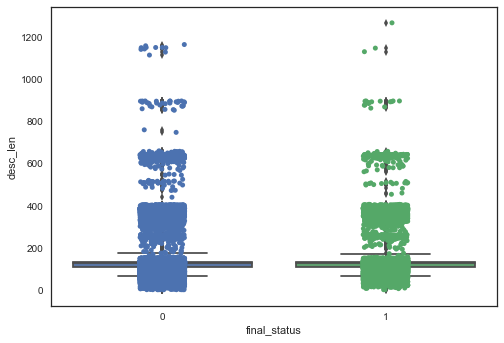

In [18]:

df = df_train_3
ax = sns.boxplot(x="final_status", y="desc_len", data=df)
ax = sns.stripplot(x="final_status", y="desc_len", data=df, jitter=True, edgecolor="gray")
plt.show()

In [286]:
len(df_train_2[df_train_2['deadline-state_changed_at'].values ==0])

45757

In [289]:
sum(df_train_2[df_train_2['deadline-state_changed_at'].values ==0].final_status)

14979

In [282]:
len(df_test_2[df_test_2['deadline-state_changed_at'].values <0])

16892

In [1]:
import pandas as pd
import numpy as np
import time

model = {}
f = open('glove.txt','r')
for line in f:
    splitLine = line.split()
    word = splitLine[0]
    embedding = [float(val) for val in splitLine[1:]]
    model[word] = embedding
print "Done.",len(model)," words loaded!"




df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")





for df in [df_train,df_test]: 
    unix_cols = ['deadline','state_changed_at','launched_at','created_at']
    for x in unix_cols:
        col = []
        for i in df[x].values:
            unix_timestamp  = int(i)
            utc_time = time.gmtime(unix_timestamp)
            local_time = time.localtime(unix_timestamp)
            col.append(time.strftime("%Y-%m-%d %H:%M:%S", local_time))
        df[x] = col
    
    disable_communication = []    
    for i in df['disable_communication'].values:
        if str(i) == 'False':
            disable_communication.append(0)
        else:
            disable_communication.append(1)
    df['disable_communication'] = disable_communication
    
    col = []
    import datetime
    for i in range(len(df)):
        x = datetime.datetime.strptime(df['state_changed_at'].values[i],"%Y-%m-%d %H:%M:%S")- datetime.datetime.strptime(df['deadline'].values[i],"%Y-%m-%d %H:%M:%S")
        col.append(x.total_seconds())
    df['deadline-state_changed_at'] = col ############################
    
    col = []
    import datetime
    for i in range(len(df)):
        x = datetime.datetime.strptime(df['launched_at'].values[i],"%Y-%m-%d %H:%M:%S")- datetime.datetime.strptime(df['created_at'].values[i],"%Y-%m-%d %H:%M:%S")
        col.append(x.total_seconds())
    df['launched_at-created_at'] = col
    
    col = []
    import datetime
    for i in range(len(df)):
        x = datetime.datetime.strptime(df['deadline'].values[i],"%Y-%m-%d %H:%M:%S")- datetime.datetime.strptime(df['launched_at'].values[i],"%Y-%m-%d %H:%M:%S")
        col.append(x.total_seconds()/86400)
    df['deadline-launched_at'] = col
    
    
    col = []
    import datetime
    for i in range(len(df)):
        x = datetime.datetime.strptime(df['deadline'].values[i],"%Y-%m-%d %H:%M:%S")- datetime.datetime.strptime(df['created_at'].values[i],"%Y-%m-%d %H:%M:%S")
        col.append(x.total_seconds()/86400)
    df['deadline-created_at'] = col
    
    
    col = [
    import datetime
    for i in range(len(df)):
        x = datetime.datetime.strptime(df['state_changed_at'].values[i],"%Y-%m-%d %H:%M:%S")- datetime.datetime.strptime(df['launched_at'].values[i],"%Y-%m-%d %H:%M:%S")
        col.append(x.total_seconds()/86400)
    df['state_changed_at-launched_at'] = col
    
    
    
    
for df in [df_train,df_test]:     
    keys_no = []
    keys_len = []
    keys = []
    for i in df['keywords'].values:
        k = i.split('-')
        keys.append(k)
        keys_len.append(len(k))
        keys_no.append(len(k))
    df['keys_no']  = keys_no
    df['keys']  = keys
    df['keys_len']  = keys_len

    words = []
    for i in range(len(df)):
        for j in df['keys'].values[i]:
                words.append(j)
    l = set(words) - set(model.keys())
    GLOVE = []
    #df_train_3['GLOVE'] = 0
    for i in range(len(df)):
        glocevecs = np.zeros(50)
        for j in df['keys'].values[i]:
            if j not in l:
                glocevecs = glocevecs+np.array(model[j])
        GLOVE.append(glocevecs)
    df['GLOVE'] = GLOVE

    for j in range(50):
        one = []
        for i in  df['GLOVE'].values:
            one.append(i[j])
        df[str(j)] = one   
        
        
        
df_train.to_csv('train_G.csv')
df_test.to_csv('test_G.csv')

Done. 400000  words loaded!


In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True